# Python-Machine-Learning-Linear-Regression-Health-Costs-Calculator
# Author: Fran Panteli
# 1. Contents  
* **1. Contents**  
* **2. Task Description**
* **3. Importing the Data & Modules**
* **4. Exploring the Healthcare Dataset**
* **5. Preprocessing Data for Training the Machine Learning Model**
* **6. Initialise the Architecture to Train the Model**
* **7. Training the Model Using a Linear Regression Approach**
* **8. Running Unit Tests for the Model in Python**

# 2. Task Description
*Note: You are currently reading this using Google Colaboratory which is a cloud-hosted version of Jupyter Notebook. This is a document containing both text cells for documentation and runnable code cells. If you are unfamiliar with Jupyter Notebook, watch this 3-minute introduction before starting this challenge: https://www.youtube.com/watch?v=inN8seMm7UI*

---

In this challenge, you will predict healthcare costs using a regression algorithm.

You are given a dataset that contains information about different people including their healthcare costs. Use the data to predict healthcare costs based on new data.

The first two cells of this notebook import libraries and the data.

Make sure to convert categorical data to numbers. Use 80% of the data as the `train_dataset` and 20% of the data as the `test_dataset`.

`pop` off the "expenses" column from these datasets to create new datasets called `train_labels` and `test_labels`. Use these labels when training your model.

Create a model and train it with the `train_dataset`. Run the final cell in this notebook to check your model. The final cell will use the unseen `test_dataset` to check how well the model generalizes.

To pass the challenge, `model.evaluate` must return a Mean Absolute Error of under 3500. This means it predicts health care costs correctly within $3500.

The final cell will also predict expenses using the `test_dataset` and graph the results.

 # 3. Importing the Data & Modules

In [ ]:
#IMPORTING MODULES
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

"""
-> The text in the markdown cell above explains the project task
	-> There are notes on this in the GitHub repository for this project
-> The code in this cell imports the modules for the project
	-> We are importing matplotlib, numpy, pandas and TensorFlow
"""

# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [ ]:
#IMPORTING DATA
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

"""
	-> The previous cell imported the modules for the project
	-> This cell imports the dataset for the project
	-> This sends an HTTP call to freeCodeCamp to import the healthcare dataset, unzips it and stores a CSV (spreadsheet file) of it in the variable called dataset
	-> We are printing out the tail of this dataset to show the format of the data which we are working with
	-> We now have the healthcare data:
		-> The demographics of patients and the cost of their healthcare
		-> This is stored in the variable called dataset
		-> We are going to first clean this data, and then train the linear regression model on it to make predictions
"""

!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2022-01-20 09:11:16--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 172.67.70.149, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.1’

insurance.csv.1     100%[===================>]  49.09K  --.-KB/s    in 0s      

2022-01-20 09:11:16 (103 MB/s) - ‘insurance.csv.1’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


# 4. Exploring the Healthcare Dataset

In [ ]:
"""
	-> Our dataset is stored in the variable called `dataset`
	-> We are using the `describe` method to print summary statistics for these data
	-> This dataset contains healthcare information about the age, BMI, number of children and expenses of US patients
	-> We are printing out summary statistics for the dataset in this cell
"""

# Exploratory analysis
dataset.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


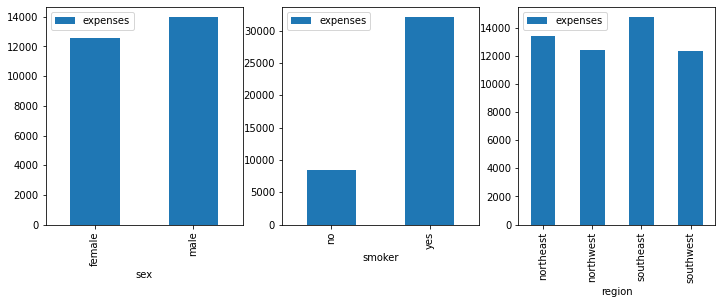

In [ ]:
"""
	From the previous cells:
		-> We have the healthcare costs of the patients <- this is the variable which we want our model to predict
		-> We also have three other variables, which are the age, BMI and number of children of each of the patients
		-> The dataset is also stored in the variable called `dataset`

	Generating subplots with Python:
		-> In this cell, we are exploring the data by generating three subplots
		-> Since we are making a model which predicts the healthcare expenses of customers based off of their demographics, we are creating a 1x3 matrix of subplots which looks at three of those demographic characteristics from the datasets and plots the average healthcare expenses for each of them with a bar chart
		-> So we are initialising a 1x3 matrix of subplots with matplotlib -> this is done in the fist line of code in this cell
		-> We are plotting categorical data ('male' or 'female' is a string, for example)
		-> The second line of code in this is telling it which data we are using to create the bar charts of -> i.e the categorical consumer data which we know in relation to their expenses
			-> We are selecting this data because its type is 'object'
			-> We store these data in the variable called cols
				-> Since these are the customer demographic data, we want to plot the mean healthcare expenses for
		-> We are then iterating through this list of different columns and creating these plots for each
		-> The mean of the expenses for each group is on the y -> this is set up so that we are iterating through and creating bar plots of the mean of the expense with that category

	From this, we can see:
		-> Male-bodied people in this dataset spend more money on healthcare than did female-bodied people
		-> The healthcare expenses of smokers was significantly higher for smokers than non-smokers on average
		-> Healthcare expenses varied by geographic region, with patients in the South-East having the highest mean healthcare expenses and those in the North-West having the minimum mean expenditure
"""

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
cols = [f for f in dataset.columns if dataset[f].dtype == 'object']
for i, feature in enumerate(cols):
    dataset[[feature,'expenses']].groupby(feature).mean().plot(kind='bar',ax=axes[i])

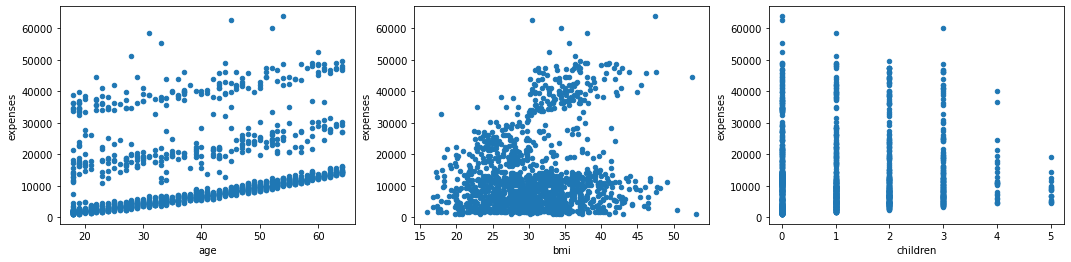

In [ ]:
"""
	This cell repeats the code in the last cell, but deals with numerical data:
		-> The previous cell plotted the categorical data in our dataset
		-> This was data which could be stored in a string (for example, if the patient was `female` or `male`)
		-> All of the data which we are investigating for trends in the dataset is an attribute of a patient (to do with their demographic), combined with the healthcare expenses of those patients
		-> The code in the previous cell dealt with this for the categorical data -> in which the mean healthcare expenses for patients were plotted against these demographics in bar charts
		-> The code in this cell does the same but for the numerical data in the set
			-> In which case we can now create scatter plots rather than bar charts
			-> This data contains different customer demographics than the previous cell does (age, BMI and the number of children per customer)

	Generating subplots with Python:
		-> This code works the same as in the previous cell (please refer to the annotations for the code in the previous cell for explanations on this)
			-> dataset is the dataset which stores the healthcare information
			-> We are iterating through the columns of this set -> and if the column which we are iterating through is the expenses column and if it's not categorical data, then we are storing it in the variable called cols
				-> This is the variable which we then iterate through to create the 1x3 matrix of subplots
				-> But this time when we iterate through the data we are creating scatter plots and not bar charts
				-> All of these scatter plots are being created with the same (expenses) data on the y-axis
					-> This is set when each scatter plot is created, rather than when the columns being iterated through are selected

	From this, we can see:
		-> The older patients become, the higher their healthcare expenses are
		-> The higher the BMI of patients, the higher their healthcare expenses
		-> The less children people have, the higher their healthcare expenses are
			-> This may indicate a more disposable income among people with less children, and therefore a higher investment in healthcare expenses among this demographic
"""

fig, axes = plt.subplots(1, 3, figsize=(18, 4))
cols = [f for f in dataset.columns if f!= 'expenses' and dataset[f].dtype != 'object']
for i, feature in enumerate(cols):
    dataset.plot.scatter(x=feature,y='expenses',ax=axes[i])

In [ ]:
"""
	-> The dataset was previously stored in a variable called dataset
	-> This cell takes this dataset and stores a copy of it in a variable called df
	-> This section of the notebook explored the data
		-> We have the healthcare expenses of US patients
		-> This is according to six patient demographics
		-> Three of these are categorical and graphed on the bar charts in this section
		-> Thee of these are numerical and graphed in the scatter plots above
	-> The next section of the notebook cleans this data to train the model on
"""

df = dataset.copy()

# 5. Preprocessing Data for Training the Machine Learning Model

In [ ]:
# Preprocessing data

"""
	What this cell does:
	-> We are cleaning the data for pre-processing, before training the model
	-> We are taking the df data frame defined in the previous cell which is a copy of the main data frame (stored in `dataframe` for the project) and converting all of its categorical data into numerical data
		-> Then having it return us a dictionary which tells us how to get from the coded form of that categorical data, back to the categorical form of the data
		-> We need all of the data in numerical form so that we can train the model on it -> this is removing the categorical data
		-> This is stored in the variable called `df`, but the original `dataframe` still contains categorical data

	The approach used to code the Python in this cell:
		-> We are first dealing with the categorical data (the three variables which we plotted in bar charts which are stored in strings)
	-> We are storing the information about that categorical data in the empty dictionary called feature_columns
		-> We are then iterating through each of the columns in the data frame df for all of the data
		-> Then we are populating the dictionary feature_columns with that information
			-> So for one column:
				-> If the data stored in that column are categorical
				-> That is, the name of the data which is stored in that column is in a string format or an 'object' -> then the data which the column contains is categorical
				-> In which case, we set the entire column equal to a variable c, which is a pandas categorical type
				-> We then replace the original column in the dataset with this -> to replace the categorical data which it represents with numerical data for our machine learning model
				-> We are doing this for the dataset called df -> which is a copy of the original one called dataset
					-> dataset will contain categorical and numerical data
					-> We are now altering df (which is the copy of it), so that it only contains numerical data
					-> we are setting it equal to the codes of this (converting the categorical data into numerical data)
				-> We are then adding the code for this column -> the code which converts its categorical value to its numerical value, into a dictionary
				-> So we end up with the df data frame which contains no categorical data (only numerical data), and a dictionary which tells us how to convert between the codes for the three pieces of categorical data - to what their original values were
				-> We need all of the data which we are training the model on to be in numerical form (not categorical form)
"""

feature_columns = {}
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        c = df[col_name].astype('category')
        df[col_name] = c.cat.codes
        feature_columns[col_name] = dict(enumerate(c.cat.categories))

In [ ]:
# Check the convertion of categorical data to numerical values
"""
	-> This cell returns the head of the data frame which the previous cell created
	-> This got rid of the categorical data in the data frame and replaced it with itself, in coded form
"""

df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


In [ ]:
# check dictionary of encoding for categorical features

"""
	-> In the previous cell when we were going from the data frame with categorical and numerical values to the data frame with numerical values only, we defined a dictionary called `feature_columns`
	-> This dictionary allows us to convert between the data which was in categorical form and its numerical equivalent
	-> This cell prints out that dictionary
		-> The categorical data is the data which describes whether the patients are smokers, where they live and their sex
"""

feature_columns

{'region': {0: 'northeast', 1: 'northwest', 2: 'southeast', 3: 'southwest'},
 'sex': {0: 'female', 1: 'male'},
 'smoker': {0: 'no', 1: 'yes'}}

In [ ]:
# Splitting data in training and testing datasets

"""
	Outline:
		-> Now we have the dataset in numerical form, we are converting it into training and test datasets
		-> We want 80% of the data to be used to train the model, and 20% of the data to be used to test the model
		-> We are training the model on the data, and we want it to be used to predict the expenses that a specific patient will accrue based off of their demographics
			-> The `target variable, label` which we want to predict is the expenses
			-> And then the `features` are the demographics of the patient which we input into the model to make its predictions -> the age of the patient, where they live etc

	How we do this is:
		-> The entire numerical data frame is called df
		-> We want four things
			-> The test dataset (80% of this total dataset)
			-> The training dataset (20% of this total dataset)
			-> Then both of those without the data which we want the model to predict (the healthcare expenses)
		-> The top line of code in this cell gives us a random data frame with 80% of the rows in it in the total data frame <- this is the training data set
		-> The next line of code gives us the test dataset <- which is the main dataset without the rows which the training dataset has
			-> This is created with the .drop method on the df data frame
		-> The next two lines are setting these datasets equal to datasets with other names
		-> Then the bottom block of code in this cell (the final two lines) gives us two more datasets, which are those same datasets but without the expenses data (this is what we are predicting)
			-> The pop method sets the dataset equal to itself, but without the column / data which was popped off
"""

train_features = df.sample(frac=0.8, random_state=0)
test_features = df.drop(train_features.index)
train_dataset = train_features.copy()
test_dataset = test_features.copy()

train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')

In [ ]:
# Build data normalizer

"""
	The concept of normalising the data as part of preprocessing:
		-> We imported the data into the data frame
		-> Then got rid of all of the categorical data and converted it all into numerical data <- you can't perform linear regression on categorical data in this case
		-> Then we converted that data frame into test and training sets
		-> In this cell we are using the TensorFlow module to normalise all of its data -> so that when we train the model it will have more stability and improve the convergence
		-> This scales the input features to have a mean of 0 and a standard deviation of 1 (rather than standardisation which is to make the magnitude of all of the datapoints fall in that range)
		-> We are forcing the data into a normal distribution using TensorFlow
		-> This is the last stage of data preprocessing for our model

	Using Python and TensorFlow to do this:
		-> The first line sets a normalisation layer
		-> That normalisation layer is equal to a variable
		-> When we later define the architecture of the model, this `variable` can be applied and it will normalise the data
			-> It's targeting the final axis of the input data
			-> This is set with the axis = -1
			-> This is how we target the numerical features in each sample
		-> The second line in this cell uses the adapt method to calculate the mean and standard deviation of the training dataset
			-> These are valleys which we use when training the data set -> to ensure that numerical values at different layers in the model are normalised
			-> This returns those values, for later use
			-> We also have that entire layer stored in the variable called `normalizer`
			-> This line converts the train dataset from a pandas data frame into a numpy array and is used to calculate its mean and standard deviation (refer to the definition of normalisation in this context above)
		-> This configures the normalisation layer with the mean and standard deviation of the training dataset
			-> The aim is to make sure that while the model is being trained, all of our data remains normalised
"""

normalizer = layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_dataset))

# 6. Initialise the Architecture to Train the Model

In [ ]:
# Define model architecture

"""
	In this cell, we define the model's architecture:
		-> We are building a neural network which is trained on the demographics of the patient data -> and then outputs a prediction for what their healthcare expenses will be
		-> This is to be trained on the data we just cleaned (for the patient healthcare expenses by demographics)
		-> We are defining the architecture for the model before training it and putting any data into it -> this is what this section does

	The architecture of the model:
		-> This cell sets the architecture for the model -> we are using two hidden layers for this
		-> We are building the neural network using Keras (TensorFlow)
		-> The argument of the function is a layer which normalises the data in that segment of the neural network
		-> The model is defined in a variable
			-> A variable called `model` is set, which stores all of the different layers of the neural network
			-> Each of the lines of code in what that variable equals is a layer of the neural network
		-> The architecture of those layers
			-> The first layer of the network is a normalisation layer (refer to the points in the previous section for this)
			-> We then have two dense (fully connected) layers -> and each of these has 64 neurones and a ReLU activation function
			-> The final layer of this is a dense layer with one neurone, considering that we are predicting one value (the health care expenditure of a patient)
			-> The ReLU activation function gets rid of all of the negatives and makes them zeros -> we want the output of the model to be a positive expenditure value

	Compiling the neural network:
		-> We first set the architecture for the neural network
		-> Now we are telling it which algorithms to run when the data is passed through it
		-> What to optimise for, and which optimisation algorithms to use
		-> In the argument for this section of code, we are telling it what loss function to use (the function we use to calculate how accurate or inaccurate the predictions are)
			-> We are telling it which optimisation algorithm to use to perform gradient descent -> in this case it's the Adam algorithm (we are also telling it what learning rate to use for this when performing gradient descent)
			-> And finally, we are telling it what metrics to optimise for -> in this case it's the MAE (Mean Absolute Error) and the Mean Squared Error (MSE)
			-> The parameters which we are compiling this model are the ones which are the most common for neural networks which use linear regression
			-> This compilation is again performed with the .compile TensorFlow method

	Returning the model:
		-> Our function returns the model
		-> Model is another term for neural network
		-> It returns the architecture of the network, combined with the algorithm which we want to use to perform linear regression
		-> The model which it's returning contains two hidden layers and returns one number (the predicted healthcare expenses for the input patient)
		-> This entire function is just to define the architecture of the model (not including any data)
		-> The reason we are defining it in a function is so that we can input the normalisation into it -> this is so that the mean and standard deviation of the data which is passed into it is normalised
			-> We are passing in data about the sex, age, BMI, number of children etc -> a lot of different data about the patient demographics, so if we are normalising all of these - it makes more sense to define a function which takes a normalisation layer as the input
			-> Each of these different metrics will affect the healthcare expenses of the patient (what we are trying to predict), combined with it being a linear regression model - which means each feature will have a different linear regression equation in relation to those healthcare expenses
"""

def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=['mae', 'mse'])
  return model

In [ ]:
# Build and compile model

"""
	This cell initialises the architecture of the model we are going to use: <- but hasn't yet trained the model on this
		-> The previous cell defined a function called `build_and_compile_model`
		-> This function generates neural networks based on an architecture with two hidden layers, then inputs a normalisation layer
		-> This cell calls this function, to initialise the neural network for the project
		-> This sets it equal to a variable called `model` -> which we haven't trained yet, but which stores the architecture for the network we want to use
		-> The second line of code in this cell prints out a summary of this architecture
		-> It hasn't been trained on data yet - but its architecture has been initialised, and we have also compiled it in the sense that we've given it the loss function and algorithm for gradient descent to use

	We currently have:
		-> The test and train datasets -> with and without the expenses column which we want the model to predict
		-> The architecture for the neural network which we want to use to train the model with
		-> We first imported the modules and data, then cleaned the data in a form which a neural network could understand (normalised it, got rid of the categorical data), then initialised the architecture for the neural network to train the model on
		-> The next stage is training the neural network with this data and linear regression, then using it to make predictions and running unit tests to ensure that this is valid
"""

model = build_and_compile_model(normalizer)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 6)                13        
 n)                                                              
                                                                 
 dense_10 (Dense)            (None, 64)                448       
                                                                 
 dense_11 (Dense)            (None, 64)                4160      
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,686
Trainable params: 4,673
Non-trainable params: 13
_________________________________________________________________


# 7. Training the Model Using a Linear Regression Approach

In [ ]:
# Train model

"""
  -> Context:
	  -> The previous cell initialised the architecture for the neural network which the model uses
	  -> The cells before this cleaned the data which we are going to use here to train the model
	  -> We are performing linear regression using the cleaned, normalised and formatted dataset which was defined earlier in the notebook
	  -> This cell is training the model on this dataset
	  -> Since there are many patient demographics, we do not just perform one linear regression and calculate a line of best fit to make these predictions (we need an entire model with multiple layers)
	  -> We are using the TensorFlow method called .fit to train the model in this cell, with the dataset being stored in the variable called model
	  -> We are setting this entire trained model equal to the variable called history
	  -> The function which we defined two cells ago was to initialise the architecture for the neural network the model uses to do this -> this entire function was defined to generate different neural networks (not to train the model)
	  -> What we use to train the model is the .fit TensorFlow method

	-> The arguments this uses are:
		-> The dataset we are training the neural network on <- this was the cleaned data from earlier
			-> We are training it on the dataset which doesn't include what we are predicting (the healthcare expenditures)
			-> We popped this information off of this dataset earlier -> so the only remaining data are the features which we are predicting
		-> The labels with the features for the patient demographics <- these are the features in the dataset which aren't in the healthcare expenditures column
		-> The percentage of that training data which we reserve for validating the model <- we use this when comparing the number of epochs used to train the dataset with in comparison to the accuracy of the model
		-> The number of epochs we want the model to use -> this is the number of times it trains itself on the same data -> going through the entire dataset
			-> If this number is too high then we run the risk of overfitting the model on the same piece of data
			-> If this number is too low, we could be limiting the accuracy of the model
			-> When we are training the model, it goes through the entire dataset 600 times - so we can see how it performs with this number (we plot the behaviour of this later)
		-> We are setting the verbosity parameter equal to 1 -> when we train the model it will output the progress and information about this, per epoch it completes

	-> This variable (`history`) is now storing information about how the model performs per epoch of its training -> which we can graph for more information about the optimal number of epochs
"""

history = model.fit(
    train_dataset,
    train_labels,
    validation_split=0.2,
    verbose=1, epochs=600)

Epoch 1/600
27/27 [==============================] - 1s 12ms/step - loss: 12712.0811 - mae: 12712.0811 - mse: 301879296.0000 - val_loss: 14426.8320 - val_mae: 14426.8320 - val_mse: 363280800.0000
Epoch 2/600
27/27 [==============================] - 0s 6ms/step - loss: 12708.7334 - mae: 12708.7334 - mse: 301786848.0000 - val_loss: 14421.8320 - val_mae: 14421.8320 - val_mse: 363127296.0000
Epoch 3/600
27/27 [==============================] - 0s 5ms/step - loss: 12701.6904 - mae: 12701.6904 - mse: 301596960.0000 - val_loss: 14411.8623 - val_mae: 14411.8623 - val_mse: 362822624.0000
Epoch 4/600
27/27 [==============================] - 0s 5ms/step - loss: 12688.6436 - mae: 12688.6436 - mse: 301244992.0000 - val_loss: 14394.5020 - val_mae: 14394.5020 - val_mse: 362301504.0000
Epoch 5/600
27/27 [==============================] - 0s 5ms/step - loss: 12666.7285 - mae: 12666.7285 - mse: 300657664.0000 - val_loss: 14366.5674 - val_mae: 14366.5674 - val_mse: 361472128.0000
Epoch 6/600
27/27 [=====

In [ ]:
#This cell defines a plotting function for the loss parameter of the model during training, throughout its different epochs -> this is for its validation and training datasets (on the same graph)
#The argument this takes is a trained model (in the syntax of the outputted trained model from the previous cell)

"""
	Context:
		-> The previous cell trained the model with 600 epochs and stored the values from this in the variable called `history`
		-> When we initialised the architecture for the neural network this uses, we asked it to return two parameters which were the MAE and MSE <- the Mean Absolute Error and the Mean Squared Error (information about the accuracy of its training)
		-> This information from training the model is stored in the `history` variable -> for all of the different epochs which we've had it perform

	Defining a function to plot this:
		-> The argument to this function is the variable from the previous cell (the data we get from training the model)
		-> This function takes this data and plots two of the values on the same figure it returns
			-> These two values are the loss function after each epoch, obtained while performing gradient descent
			-> The values of this function correspond to the accuracy of the model while training the model on 80% of its data
			-> The other variable this plots is val_loss
			-> 80% of the entire dataset is training data -> 20% of that 80% is validation data
			-> We are performing gradient descent on both the training and validation data
			-> We are doing it on both of them at the same time to see how different they are -> we know that if the model produces wildly different predictions for the validation data then it may have overfit for the training data (in other words the number of epochs we are using may be too high)
			-> The second value we are plotting is the loss function we are using to train the model with - on the validation data
			-> The first value is this - for the training data
		-> The rest of the parameters we are using in this plotting function are for its appearance (the text not the axes, the presence of a legend and grid)
"""

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

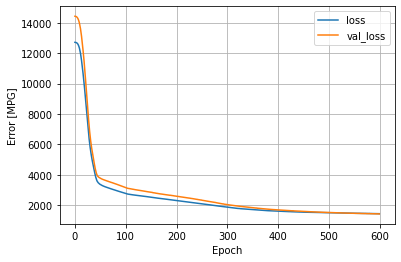

In [ ]:
"""
	-> This cell calls the plotting function defined in the previous cell
	-> Why this plot is made the way that it is:
		-> The two series which this graph plots are the validation loss and loss functions for the model during its training
		-> When we train the model, we want to maximise its maximise its accuracy -> which means minimising its loss
		-> We take the entire dataset and split it into training data (80%) and test data (20%)
		-> `history` is taking the data about the value of the loss function when the model is being trained -> that is what is being plotted here
		-> An epoch refers to one time the model is trained on the entire dataset -> this model is trained on the same one 600 times
		-> We are doing this using the training dataset
			-> That dataset represents 80% of all of the data which we've imported into the project
			-> But for each epoch (time we train the model on that data), we are running the gradient descent algorithm on it twice
				-> We have taken the training data and divided it into validation and test data
				-> The validation data makes up 20% of the test data, which makes up 80% of the total dataset
		-> The reason we split the test data into test and validation data is because we want to know how consistent the results are when we train the model
			-> Which they are
			-> This indicates that the model is generalisable (and hasn't been overfit)
			-> Since we are using it to make predictions on other datasets

	-> What this shows:
		-> The training and validation loss curves are similar -> which means that the model can safely be generalised to other data
		-> Our model hasn't overfit the data
		-> Out loss curves have a huge decrease around 50 epochs -> and after this the loss functions don't dip as much
"""

plot_loss(history)

# 8. Running Unit Tests for the Model in Python

9/9 - 0s - loss: 2148.6702 - mae: 2148.6699 - mse: 32152824.0000 - 37ms/epoch - 4ms/step
Testing set Mean Abs Error: 2148.67 expenses
You passed the challenge. Great job!


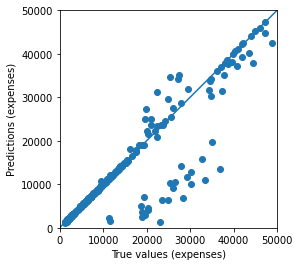

In [ ]:
#Running unit tests on our trained model using 20% of the data that was reserved for this
#We are now testing the predictions of the model to see how accurate they are -> and plotting this

"""
	-> This cell runs the unit tests for our project
	-> The model takes information about the patient demographics and uses the linear regression method to make predictions about the healthcare expenditures of that patient based on their demographics, which the model was previously trained on
	-> Considering that this is for a US healthcare system and the patients have to pay for their healthcare
	-> We initially imported the data into the notebook -> 80% of this data was used to train the model (this was randomly selected)
	-> The other 20% of the data was reserved for testing the trained model
	-> Considering that the previous cell trained this model - we are now using the remaining 20% of the data to perform these unit tests in this cell
	-> We know that the predictions that the model makes about the predicted healthcare expenditures of a patient aren't entirely inaccurate if they fall within an uncertainty of $3, 500
		-> This is what the code below is testing
	-> We are then plotting these predictions:
		-> We are doing this multiple times and plotting all of the predictions it makes for this on the graph below
		-> We are plotting these predictions in comparison to their actual values for the remaining 20% of the data reserved for this
		-> If the two match -> then they will fall on the line y = x
		-> This cell also returns a validation message for this, to confirm if our predictions are accurate enough in comparison to the project requirements
	-> The values we are comparing when we do this are the MAE and MSE of our predictions and of the test data which it hasn't seen before
		-> When we are doing this, we are also flattening the data into a 1D array
		-> The line y = x represents the perfect case, where our predicted values equal the values which we are trying to predict
    -> Our model has successfully pass these tests in this case
"""

# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)